In [109]:
# Sanjay Agarwal
# a) Text Moderator based on Hugging Face pre-trained model to classify text
#    into 18 categories.
# b) Implemented gradio text IO to submit and receive text response
# c) Find the category and value for the type of toxicity
# d) Bar chart to plot the toxicity

In [65]:
# Dataset, currently classifies text into 18 categories
# https://huggingface.co/datasets/ifmain/text-moderation-410K
"""
harassment
harassment_threatening
hate
hate_threatening
self_harm
self_harm_instructions
self_harm_intent
sexual
sexual_minors
violence
violence_graphic
self-harm
sexual/minors
hate/threatening
violence/graphic
self-harm/intent
self-harm/instructions
harassment/threatening
"""

'\nharassment\nharassment_threatening\nhate\nhate_threatening\nself_harm\nself_harm_instructions\nself_harm_intent\nsexual\nsexual_minors\nviolence\nviolence_graphic\nself-harm\nsexual/minors\nhate/threatening\nviolence/graphic\nself-harm/intent\nself-harm/instructions\nharassment/threatening\n'

In [66]:
pip install gradio

In [67]:
pip install transformers torch

In [68]:
import json
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [69]:
import pandas as pd

In [102]:
import matplotlib.pyplot as plt

In [70]:
# Load the tokenizer and model
model_name = "ifmain/ModerationBERT-ML-En"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=18)

In [71]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [72]:
def predict(text, model, tokenizer):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    predictions = torch.sigmoid(outputs.logits)  # Convert logits to probabilities
    return predictions

In [7]:
# Define the categories
categories = ['harassment', 'harassment_threatening', 'hate', 'hate_threatening',
              'self_harm', 'self_harm_instructions', 'self_harm_intent', 'sexual',
              'sexual_minors', 'violence', 'violence_graphic', 'self-harm',
              'sexual/minors', 'hate/threatening', 'violence/graphic',
              'self-harm/intent', 'self-harm/instructions', 'harassment/threatening']

In [74]:
# Example usage
new_text = "go away, you idiot, do not come back"
predictions = predict(new_text, model, tokenizer)

In [75]:
# Convert predictions to a dictionary
category_scores = {categories[i]: predictions[0][i].item() for i in range(len(categories))}

In [76]:
output = {
    "text": new_text,
    "category_scores": category_scores
}

In [77]:
# Print the result as a JSON with indentation
print(json.dumps(output, indent=4, ensure_ascii=False))

{
    "text": "go away, you idiot, do not come back",
    "category_scores": {
        "harassment": 0.9744502902030945,
        "harassment_threatening": 0.00047903115046210587,
        "hate": 0.008137796074151993,
        "hate_threatening": 9.030137562149321e-07,
        "self_harm": 3.6223868846718688e-06,
        "self_harm_instructions": 3.05551293422468e-05,
        "self_harm_intent": 3.6056987937627127e-06,
        "sexual": 0.0007075229659676552,
        "sexual_minors": 4.120922767469892e-06,
        "violence": 0.00021864006703253835,
        "violence_graphic": 1.0059319492938812e-06,
        "self-harm": 3.4709182727965526e-06,
        "sexual/minors": 4.319850631873123e-06,
        "hate/threatening": 8.465782457278692e-07,
        "violence/graphic": 9.354042731501977e-07,
        "self-harm/intent": 3.1655808925279416e-06,
        "self-harm/instructions": 3.117222877335735e-05,
        "harassment/threatening": 0.0004914393066428602
    }
}


In [78]:
def find_dict_max(dict_1):
  # get the maximum value in the dictionary
  max_val = max(dict_1.values())
  # loop through the dictionary
  for key in dict_1:
    # check if the value of the current key is equal to the maximum value
    if dict_1[key] == max_val:
      print("Keys with maximum values are :", key, max_val)

In [79]:
def this_text(my_text):
  predictions = predict(my_text, model, tokenizer)
  category_scores = {categories[i]: predictions[0][i].item() for i in range(len(categories))}
  output = {
    "text": my_text,
    "category_scores": category_scores}
  output_2 = {
    "category_scores": category_scores}
  print(json.dumps(output, indent=4, ensure_ascii=False))
  o2 = output_2['category_scores']
  return o2

In [80]:
text_1 = "let me tell you little man, a personal attack will be when I find you and beat the hell out of you. Be very glad I don't know where you live or where I can find you."

In [81]:
o2 = this_text(text_1)

{
    "text": "let me tell you little man, a personal attack will be when I find you and beat the hell out of you. Be very glad I don't know where you live or where I can find you.",
    "category_scores": {
        "harassment": 0.6759029030799866,
        "harassment_threatening": 0.9648743271827698,
        "hate": 0.036711420863866806,
        "hate_threatening": 0.05454448610544205,
        "self_harm": 0.00017003300308715552,
        "self_harm_instructions": 0.0017879246734082699,
        "self_harm_intent": 0.00038172618951648474,
        "sexual": 0.006945426110178232,
        "sexual_minors": 0.0002574095851741731,
        "violence": 0.8956981301307678,
        "violence_graphic": 0.0006830751663073897,
        "self-harm": 0.00017526962619740516,
        "sexual/minors": 0.000286444672383368,
        "hate/threatening": 0.0551639199256897,
        "violence/graphic": 0.0006925142952241004,
        "self-harm/intent": 0.00039052049396559596,
        "self-harm/instructions":

In [82]:
find_dict_max(o2)

Keys with maximum values are : harassment_threatening 0.9648743271827698


In [83]:
text_1 =  "i hate your guts   i hope you feel good about that"

In [84]:
o2 = this_text(text_1)

{
    "text": "i hate your guts   i hope you feel good about that",
    "category_scores": {
        "harassment": 0.24382829666137695,
        "harassment_threatening": 1.062026058207266e-06,
        "hate": 9.927562496159226e-05,
        "hate_threatening": 4.326847324875871e-09,
        "self_harm": 4.594256552081788e-06,
        "self_harm_instructions": 2.2075359083828516e-05,
        "self_harm_intent": 3.325580564705888e-06,
        "sexual": 0.008731835521757603,
        "sexual_minors": 1.3866327208233997e-05,
        "violence": 1.5928901120787486e-05,
        "violence_graphic": 2.2172179114932078e-07,
        "self-harm": 4.2921974454657175e-06,
        "sexual/minors": 1.243342376255896e-05,
        "hate/threatening": 4.2802650312978585e-09,
        "violence/graphic": 2.0847316761773982e-07,
        "self-harm/intent": 3.1796350867807632e-06,
        "self-harm/instructions": 1.891064312076196e-05,
        "harassment/threatening": 1.1115246252302313e-06
    }
}


In [85]:
o2

{'harassment': 0.24382829666137695,
 'harassment_threatening': 1.062026058207266e-06,
 'hate': 9.927562496159226e-05,
 'hate_threatening': 4.326847324875871e-09,
 'self_harm': 4.594256552081788e-06,
 'self_harm_instructions': 2.2075359083828516e-05,
 'self_harm_intent': 3.325580564705888e-06,
 'sexual': 0.008731835521757603,
 'sexual_minors': 1.3866327208233997e-05,
 'violence': 1.5928901120787486e-05,
 'violence_graphic': 2.2172179114932078e-07,
 'self-harm': 4.2921974454657175e-06,
 'sexual/minors': 1.243342376255896e-05,
 'hate/threatening': 4.2802650312978585e-09,
 'violence/graphic': 2.0847316761773982e-07,
 'self-harm/intent': 3.1796350867807632e-06,
 'self-harm/instructions': 1.891064312076196e-05,
 'harassment/threatening': 1.1115246252302313e-06}

In [86]:
find_dict_max(o2)

Keys with maximum values are : harassment 0.24382829666137695


In [87]:
text_1 =  "you bought cupcakes, how original"

In [88]:
o2 = this_text(text_1)

{
    "text": "you bought cupcakes, how original",
    "category_scores": {
        "harassment": 0.0005933633656241,
        "harassment_threatening": 1.8261086154325312e-07,
        "hate": 1.5903423218333046e-06,
        "hate_threatening": 2.536026277866199e-09,
        "self_harm": 5.978174044685147e-07,
        "self_harm_instructions": 7.641643833267153e-07,
        "self_harm_intent": 6.229635118870647e-07,
        "sexual": 1.2989661627216265e-05,
        "sexual_minors": 3.6438788697523705e-07,
        "violence": 2.9464679300872376e-06,
        "violence_graphic": 1.9127758932313554e-08,
        "self-harm": 5.93622417000006e-07,
        "sexual/minors": 3.9599072465534846e-07,
        "hate/threatening": 2.195623016731929e-09,
        "violence/graphic": 1.831942597618763e-08,
        "self-harm/intent": 5.153090683052142e-07,
        "self-harm/instructions": 8.701500178176502e-07,
        "harassment/threatening": 1.73733113228991e-07
    }
}


In [89]:
find_dict_max(o2)

Keys with maximum values are : harassment 0.0005933633656241


In [97]:
text_1 = "You look very hot"

In [98]:
o2 = this_text(text_1)

{
    "text": "You look very hot",
    "category_scores": {
        "harassment": 0.028836173936724663,
        "harassment_threatening": 1.029555676268501e-07,
        "hate": 2.3798107577022165e-05,
        "hate_threatening": 9.316236670997569e-10,
        "self_harm": 2.0670763944963255e-07,
        "self_harm_instructions": 7.902590368757956e-07,
        "self_harm_intent": 2.4126342168528936e-07,
        "sexual": 0.0002278088213643059,
        "sexual_minors": 1.826296397666738e-06,
        "violence": 9.547417221256183e-07,
        "violence_graphic": 1.4496281508513675e-08,
        "self-harm": 2.0604596784323803e-07,
        "sexual/minors": 1.8578199387775385e-06,
        "hate/threatening": 8.990732602853768e-10,
        "violence/graphic": 1.327863063949053e-08,
        "self-harm/intent": 1.9935950490435062e-07,
        "self-harm/instructions": 7.912446449154231e-07,
        "harassment/threatening": 1.0049946297385759e-07
    }
}


In [92]:
find_dict_max(o2)

Keys with maximum values are : harassment 0.028836173936724663


In [93]:
find_dict_max(o2)

Keys with maximum values are : harassment 0.028836173936724663


In [94]:
import gradio as gr

In [23]:
# from gradio_client import Client

In [95]:
demo = gr.Interface(fn=this_text, inputs="text", outputs="text")

In [96]:
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a0d5d9e2642e51d7be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [31]:
demo.close()

Closing server running on port: 7860


In [99]:
o2

{'harassment': 0.028836173936724663,
 'harassment_threatening': 1.029555676268501e-07,
 'hate': 2.3798107577022165e-05,
 'hate_threatening': 9.316236670997569e-10,
 'self_harm': 2.0670763944963255e-07,
 'self_harm_instructions': 7.902590368757956e-07,
 'self_harm_intent': 2.4126342168528936e-07,
 'sexual': 0.0002278088213643059,
 'sexual_minors': 1.826296397666738e-06,
 'violence': 9.547417221256183e-07,
 'violence_graphic': 1.4496281508513675e-08,
 'self-harm': 2.0604596784323803e-07,
 'sexual/minors': 1.8578199387775385e-06,
 'hate/threatening': 8.990732602853768e-10,
 'violence/graphic': 1.327863063949053e-08,
 'self-harm/intent': 1.9935950490435062e-07,
 'self-harm/instructions': 7.912446449154231e-07,
 'harassment/threatening': 1.0049946297385759e-07}

In [100]:
df = pd.DataFrame(o2.items(), columns=['Category', 'Cat_Value'])

In [107]:
df = df.sort_values(by='Cat_Value', ascending=True)

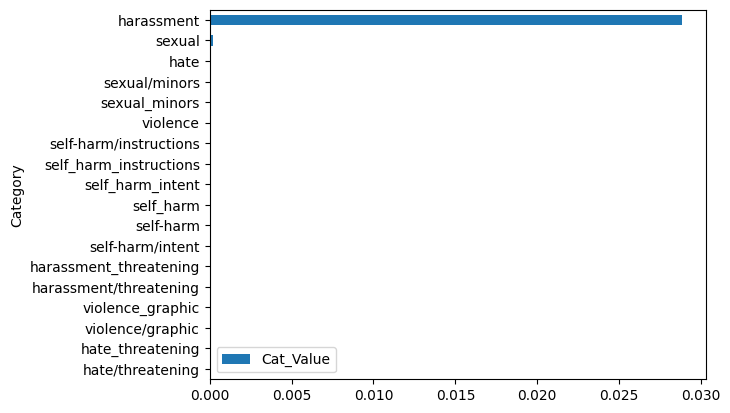

In [108]:
# Create a bar plot
df.plot.barh(x='Category', y='Cat_Value', rot=0)
plt.show()